1. Import libraries and dataset
2. Inspect data
3. Clean and pre-process data
4. Reshape Target variable
5. Extract features from data
6. Build model for multilabel classification
7. Make predictions and evaluate model on validation set
8. Define inference function for new data

### Import Required Libraries

In [103]:
import pandas as pd
import numpy as np
import re
import nltk
import spacy
from tqdm import tqdm
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_colwidth', 200)

### Read Dataset

In [104]:
# read dataset
df_questions = pd.read_hdf('auto_tagging_data_v2.h5')

### Inspect Data

In [105]:
df_questions.sample(6, random_state=11)

,Id,Title,Body,Tags
41763,92185,Why is Sampling Importance Resampling (SIR) better than Importance Sampling (IS)?,"<p>From what I understand, SIR is a mechanism for sampling from a distribution $p$ that works as follows:</p>\n\n<ol>\n<li>Approximate a target distribution $p$ using an importance sample $S$ fro...","[sampling, mcmc]"
4245,179778,optimization approach in logistic regression,<p>In logistic regression we need to maximise the log likelihood which boils down to minimising a function which is sum of multiple log functions. We normally use gradient descent approach there. ...,"[machine-learning, logistic, classification, optimization]"
37183,168679,Consequences of violating proportional hazards assumption in Cox model,"<p>What are the consequences of violating the Proportional Hazards assumption in a Cox Model? I've got a Model where two factors are highly significative, but all the estimated betas associated to...","[regression, survival, cox-model]"
55932,144226,Moments and density tails,"<p>Assume that the first $n$ moments $m_1,\dots\,m_n$ of a random variable $X\in\mathbb{R}$ are known, but not its probability density function $p(x)$. </p>\n\n<p>Does there exist a methodology to...","[probability, pdf]"
47629,142745,What is the demonstration of the variance of the difference of two dependent variables?,"<p>I know that the variance of the difference of two independent variables is the sum of variances, and I can prove it. I want to know where the covariance goes in the other case.</p>\n","[variance, covariance]"
49639,195347,Rules for choosing how much training data one needs to learn a Radial Basis Function (RBF) model?,<p>I was trying to understand how much data I would need compared to the number of parameters (and to have good generalization) when I train a radial basis function (RBF) network on a regression t...,"[machine-learning, nonlinear-regression]"


In [106]:
# combine title and body
df_questions['Text'] = df_questions["Title"] + " " + df_questions["Body"]
df_questions.sample(6, random_state=11)

,Id,Title,Body,Tags,Text
41763,92185,Why is Sampling Importance Resampling (SIR) better than Importance Sampling (IS)?,"<p>From what I understand, SIR is a mechanism for sampling from a distribution $p$ that works as follows:</p>\n\n<ol>\n<li>Approximate a target distribution $p$ using an importance sample $S$ fro...","[sampling, mcmc]","Why is Sampling Importance Resampling (SIR) better than Importance Sampling (IS)? <p>From what I understand, SIR is a mechanism for sampling from a distribution $p$ that works as follows:</p>\n\n..."
4245,179778,optimization approach in logistic regression,<p>In logistic regression we need to maximise the log likelihood which boils down to minimising a function which is sum of multiple log functions. We normally use gradient descent approach there. ...,"[machine-learning, logistic, classification, optimization]",optimization approach in logistic regression <p>In logistic regression we need to maximise the log likelihood which boils down to minimising a function which is sum of multiple log functions. We n...
37183,168679,Consequences of violating proportional hazards assumption in Cox model,"<p>What are the consequences of violating the Proportional Hazards assumption in a Cox Model? I've got a Model where two factors are highly significative, but all the estimated betas associated to...","[regression, survival, cox-model]",Consequences of violating proportional hazards assumption in Cox model <p>What are the consequences of violating the Proportional Hazards assumption in a Cox Model? I've got a Model where two fact...
55932,144226,Moments and density tails,"<p>Assume that the first $n$ moments $m_1,\dots\,m_n$ of a random variable $X\in\mathbb{R}$ are known, but not its probability density function $p(x)$. </p>\n\n<p>Does there exist a methodology to...","[probability, pdf]","Moments and density tails <p>Assume that the first $n$ moments $m_1,\dots\,m_n$ of a random variable $X\in\mathbb{R}$ are known, but not its probability density function $p(x)$. </p>\n\n<p>Does th..."
47629,142745,What is the demonstration of the variance of the difference of two dependent variables?,"<p>I know that the variance of the difference of two independent variables is the sum of variances, and I can prove it. I want to know where the covariance goes in the other case.</p>\n","[variance, covariance]","What is the demonstration of the variance of the difference of two dependent variables? <p>I know that the variance of the difference of two independent variables is the sum of variances, and I ca..."
49639,195347,Rules for choosing how much training data one needs to learn a Radial Basis Function (RBF) model?,<p>I was trying to understand how much data I would need compared to the number of parameters (and to have good generalization) when I train a radial basis function (RBF) network on a regression t...,"[machine-learning, nonlinear-regression]",Rules for choosing how much training data one needs to learn a Radial Basis Function (RBF) model? <p>I was trying to understand how much data I would need compared to the number of parameters (and...


In [107]:
df_questions['Text'].head()

0    The Two Cultures: statistics vs. machine learning? <p>Last year, I read a blog post from <a href="http://anyall.org/">Brendan O'Connor</a> entitled <a href="http://anyall.org/blog/2008/12/statisti...
1    Forecasting demographic census <p>What are some of the ways to forecast demographic census with some validation and calibration techniques?</p>\n\n<p>Some of the concerns:</p>\n\n<ul>\n<li>Census ...
2                             Bayesian and frequentist reasoning in plain English <p>How would you describe in plain English the characteristics that distinguish Bayesian from Frequentist reasoning?</p>\n
3    What is the meaning of p values and t values in statistical tests? <p>After taking a statistics course and then trying to help fellow students, I noticed one subject that inspires much head-desk b...
4    Examples for teaching: Correlation does not mean causation <p>There is an old saying: "Correlation does not mean causation". When I teach, I tend to use the following standard

### Clean and Pre-process Data

In [108]:
def clean_text(text):
    # remove html tags and url links
    text = re.sub(r'<.*?>', '', text)
    # remove everything alphabets
    text = re.sub("[^a-zA-Z]"," ",text)
    # remove whitespaces
    text = ' '.join(text.split())
    
    return text

In [109]:
df_questions['Text'] = df_questions['Text'].apply(lambda x: clean_text(x))
df_questions['Text'] = df_questions['Text'].str.lower()

In [110]:
df_questions[['Id', 'Text', 'Tags']].sample(6, random_state=11)

,Id,Text,Tags
41763,92185,why is sampling importance resampling sir better than importance sampling is from what i understand sir is a mechanism for sampling from a distribution p that works as follows approximate a target...,"[sampling, mcmc]"
4245,179778,optimization approach in logistic regression in logistic regression we need to maximise the log likelihood which boils down to minimising a function which is sum of multiple log functions we norma...,"[machine-learning, logistic, classification, optimization]"
37183,168679,consequences of violating proportional hazards assumption in cox model what are the consequences of violating the proportional hazards assumption in a cox model i ve got a model where two factors ...,"[regression, survival, cox-model]"
55932,144226,moments and density tails assume that the first n moments m dots m n of a random variable x in mathbb r are known but not its probability density function p x does there exist a methodology to cha...,"[probability, pdf]"
47629,142745,what is the demonstration of the variance of the difference of two dependent variables i know that the variance of the difference of two independent variables is the sum of variances and i can pro...,"[variance, covariance]"
49639,195347,rules for choosing how much training data one needs to learn a radial basis function rbf model i was trying to understand how much data i would need compared to the number of parameters and to hav...,"[machine-learning, nonlinear-regression]"


In [111]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [112]:
def strip_stopwords(text):
    clean_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(clean_text)

In [113]:
df_questions['Text_clean'] = df_questions['Text'].apply(lambda x: strip_stopwords(x))

### Reshape Target Variable

In [114]:
from sklearn.preprocessing import MultiLabelBinarizer

In [115]:
multilabel_binarizer = MultiLabelBinarizer()

multilabel_binarizer.fit(df_questions['Tags'])

# transform target variable ("Tags")
Y = multilabel_binarizer.transform(df_questions['Tags'])

In [116]:
Y.shape

(76365, 100)

### Feature Extraction

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [118]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=1000)

X_tfidf = tfidf_vectorizer.fit_transform(df_questions['Text_clean'])

In [119]:
X_tfidf.shape

(76365, 1000)

### Train-Test Split

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
# split dataset into training and validation set
x_train_tfidf, x_val_tfidf, y_train_tfidf, y_val_tfidf = train_test_split(X_tfidf, Y, test_size=0.2, random_state=9)

### Model Building

In [122]:
from sklearn.linear_model import LogisticRegression

from sklearn import svm

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

In [123]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [124]:
# fit model on train data
clf.fit(x_train_tfidf, y_train_tfidf)

OneVsRestClassifier(estimator=LogisticRegression())

### Predictions and Performane Evaluation

In [125]:
# make predictions for validation set
y_pred = clf.predict(x_val_tfidf)

In [126]:
# print prediction
print(y_pred[:3])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]


In [127]:
multilabel_binarizer.inverse_transform(y_pred)[:3]

[('prediction',), ('variance',), ('r', 'time-series')]

In [128]:
#evaluate performance

f1_score(y_val_tfidf, y_pred, average=None)

array([0.01960784, 0.62836186, 0.6873065 , 0.4375    , 0.59619952,
       0.19117647, 0.42490842, 0.63709677, 0.48387097, 0.24680851,
       0.55961071, 0.4380531 , 0.73684211, 0.23188406, 0.59180036,
       0.59701493, 0.42211055, 0.56626506, 0.63414634, 0.        ,
       0.28865979, 0.34660422, 0.02580645, 0.18666667, 0.31666667,
       0.02247191, 0.20448878, 0.29213483, 0.30057803, 0.54271357,
       0.41696113, 0.54266958, 0.42630385, 0.096     , 0.35416667,
       0.0952381 , 0.52961672, 0.15075377, 0.31404959, 0.02072539,
       0.67387387, 0.38053097, 0.00554017, 0.52054795, 0.59090909,
       0.36363636, 0.19095477, 0.47619048, 0.5785381 , 0.        ,
       0.22522523, 0.01010101, 0.02020202, 0.1192053 , 0.33043478,
       0.22823985, 0.18978102, 0.75070822, 0.09009009, 0.27230047,
       0.38019169, 0.29767442, 0.51461988, 0.47619048, 0.15686275,
       0.51181102, 0.80708661, 0.33502538, 0.47659574, 0.09278351,
       0.1048951 , 0.42225859, 0.34782609, 0.42741935, 0.54992

In [129]:
np.mean(f1_score(y_val_tfidf, y_pred, average=None))

0.35738569667921183

In [130]:
# evaluate performance
f1_score(y_val_tfidf, y_pred, average="micro")

0.4424561722227268

In [131]:
f1_score(y_val_tfidf, y_pred, average="macro")

0.35738569667921183

In [132]:
# predict probabilities
y_pred_prob = clf.predict_proba(x_val_tfidf)

In [133]:
# set threshold value
t = 0.45

# convert to integers
y = (y_pred_prob >= t).astype(int)
f1_score(y_val_tfidf, y, average="micro")

0.46342372361181133

In [134]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_val_tfidf, y)*100, "%")

Accuracy: 15.877692660250114 %


### Inference

In [135]:
def infer_tags(q):
    q = clean_text(q)
    q = q.lower()
    q = strip_stopwords(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = clf.predict(q_vec)
    return multilabel_binarizer.inverse_transform(q_pred)

In [136]:
# give new question
new_q = "Regression line in ggplot doesn't match computed regression Im using R and created a chart using ggplot2. I then create a regression so I can make some predicitions I pass my data frame of to the predict function predict(regression, Measures) I'd expect the predictions to be the same as if I used the regression line on the chart, but they aren't the same. Why would this be the case? Is there a setting in ggplot or is my expectation incorrect?"

# get tags
infer_tags(new_q)

[('regression',)]

### Word2Vec Model

In [137]:
from gensim.utils import simple_preprocess

In [138]:
X= df_questions.Text_clean.apply(lambda x:simple_preprocess(x))

In [139]:
from gensim.models import Word2Vec 

In [140]:
w2v_model = Word2Vec(X, vector_size=300, min_count=2, sg=1, negative= 5)

# vocabulary and it's size

In [141]:
print('vocabulary size:', len(w2v_model.wv))

vocabulary size: 49083


In [142]:
list(w2v_model.wv.key_to_index.items())[:20]

[('data', 0),
 ('model', 1),
 ('lt', 2),
 ('would', 3),
 ('test', 4),
 ('one', 5),
 ('using', 6),
 ('regression', 7),
 ('time', 8),
 ('use', 9),
 ('two', 10),
 ('variables', 11),
 ('distribution', 12),
 ('variable', 13),
 ('like', 14),
 ('value', 15),
 ('mean', 16),
 ('values', 17),
 ('sample', 18),
 ('different', 19)]

In [143]:
words_statistics = w2v_model.wv.most_similar('statistics')
words_statistics

[('craig', 0.6091952323913574),
 ('stats', 0.6003299355506897),
 ('coursework', 0.5975223779678345),
 ('biostatistics', 0.596872091293335),
 ('hogg', 0.5797931551933289),
 ('syllabus', 0.5783936977386475),
 ('underpinning', 0.5720289945602417),
 ('mitx', 0.5702240467071533),
 ('lesson', 0.5655654072761536),
 ('engineers', 0.5633484721183777)]

# visualizaing the word embeddings 

In [144]:
# generate similar word lists
words_statistics = w2v_model.wv.most_similar('statistics')
words_algorithm = w2v_model.wv.most_similar('algorithm')
words_value = w2v_model.wv.most_similar('value')
# combine word lists 
words = words_statistics + words_algorithm + words_value

# extract only the word and not the similarity score
words = list(map(lambda x: x[0], words))

In [145]:
from matplotlib import pyplot
from sklearn.decomposition import PCA

# plots w2v embeddings of a given word list
def plot_w2v(word_list):
    X = w2v_model.wv[word_list]
    
    # reduce dimensions to 2
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    
    # create a scatter plot of the projection
    pyplot.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(word_list):
        pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
        
    # show
    pyplot.figure(figsize=(6,15))
    pyplot.show()

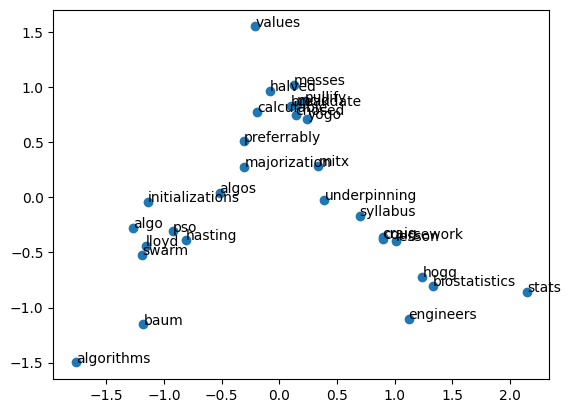

<Figure size 600x1500 with 0 Axes>

In [146]:
plot_w2v(words)

#### creating the "X" from our Word2Vec model developed above 


In [147]:
# returns vector reperesentation of a given word if it is present in vocabulary
def get_embedding_w2v(doc_tokens):
    embeddings = []
    model = w2v_model
    # iterate over tokens to extract their vectors    
    for tok in doc_tokens:
        if tok in model.wv:
            embeddings.append(model.wv.get_vector(tok))
    # mean the vectors of individual words to get the vector of the statement
    return np.mean(embeddings, axis=0)

In [148]:
X_w2v_model = X.apply(lambda x: get_embedding_w2v(x))
X_w2v_model = pd.DataFrame(X_w2v_model.tolist())
print('X shape:', X_w2v_model.shape)

X shape: (76365, 300)


In [149]:
X_train_wm, X_test_wm, y_train_wm, y_test_wm = train_test_split(X_w2v_model, Y, test_size=0.2, random_state=42)

In [150]:
from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import GaussianNB

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

In [151]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [152]:
clf.fit(X_train_wm, y_train_wm)

c:\Users\karan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\karan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

OneVsRestClassifier(estimator=LogisticRegression())

In [153]:
y_pred_prob = clf.predict_proba(X_test_wm)

In [154]:
from sklearn.metrics import accuracy_score

In [155]:
# set threshold value
t = 0.45

# convert to integers
y = (y_pred_prob >= t).astype(int)
f1_score(y_test_wm, y, average="micro")

0.41383967764446344

In [156]:
print("Accuracy:", accuracy_score(y_test_wm, y)*100, "%")

Accuracy: 13.101551758004321 %
